In [63]:
!git clone https://github.com/camillasancricca/DATADIQ.git

fatal: destination path 'DATADIQ' already exists and is not an empty directory.


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from DATADIQ.projects.A_data_collection import make_dataset_for_classification
from DATADIQ.projects.D_data_analysis import classification
from DATADIQ.projects.E_plot_results import plot

from DATADIQ import scripts_for_E5 as s

seed=2024

In [65]:
X, y = make_dataset_for_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, seed=seed)

df = pd.DataFrame(X)
df

,0,1,2,3,4
0,0.973723,2.804397,-0.300831,1.448791,0.553982
1,-0.958050,0.837400,0.938903,-0.545706,1.026823
2,-1.855599,-0.314043,0.126241,-2.888675,-1.110085
3,-0.093354,1.475853,1.444273,-0.480373,-2.266737
4,-0.100938,0.550623,-0.476341,-1.265839,1.399365
...,...,...,...,...,...
995,-1.498142,-1.000903,-2.849355,-3.339761,0.317906
996,2.610183,-0.963824,3.156669,-0.279722,-0.791273
997,-2.555454,1.851760,2.927063,0.148744,-1.061322
998,0.753282,-1.641176,5.510577,-1.396730,-1.304814


In [66]:
df.shape[1]

5

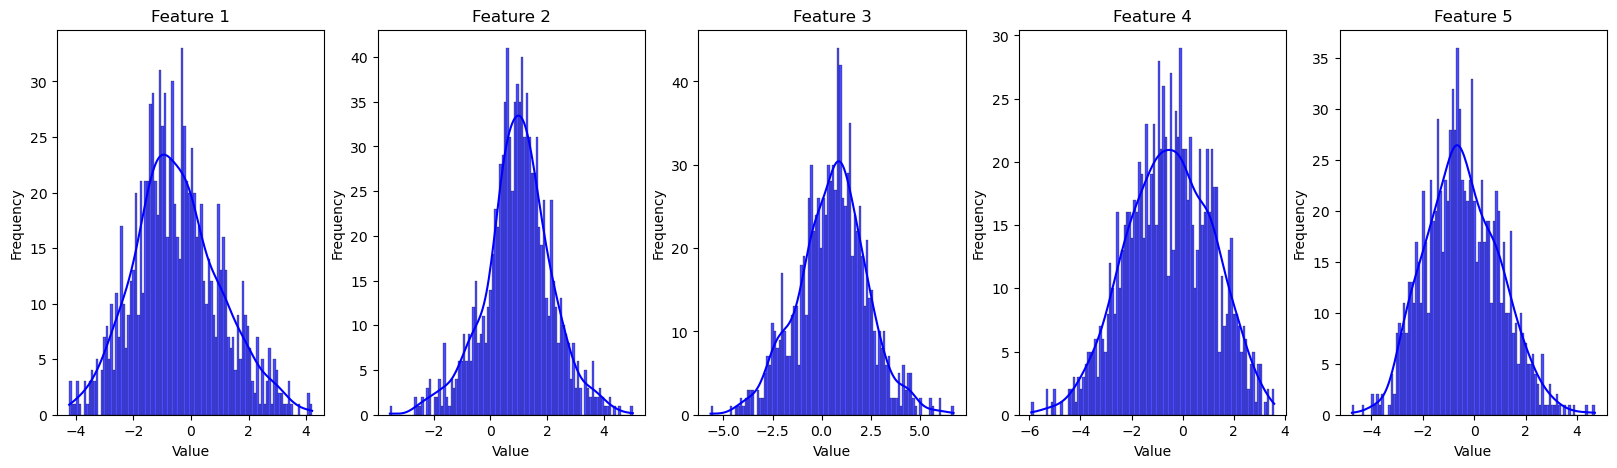

In [67]:
#create a subplot with 1 row and 5 columns
fig, axs = plt.subplots(1, 5, figsize=(20,5))

#plot the histograms of the first 5 features of the polluted dataframe

for i in range(df.shape[1]):
    #plot a row of histograms with the distribution of the features
    axs[i].set_title('Feature '+str(i+1))
    sns.histplot(df[i], bins=100,color='blue', kde = True, alpha=0.7, label='X', edgecolor='black', ax=axs[i])
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
plt.show()


In [68]:
df.describe()

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.485504,0.978707,0.542366,-0.517140,-0.457075
std,1.495429,1.182948,1.768717,1.668184,1.434625
min,-4.232735,-3.540325,-5.657669,-5.930186,-4.760246
25%,-1.466754,0.361620,-0.539758,-1.690305,-1.456981
50%,-0.619202,1.005620,0.652575,-0.486842,-0.551794
75%,0.403256,1.658966,1.660974,0.726299,0.530026
max,4.205882,5.026792,6.718839,3.590738,4.690179


Training for DecisionTree...
Training for LogisticRegression...
Training for KNN...
Training for RandomForest...
Training for AdaBoost...
Training for MLP...


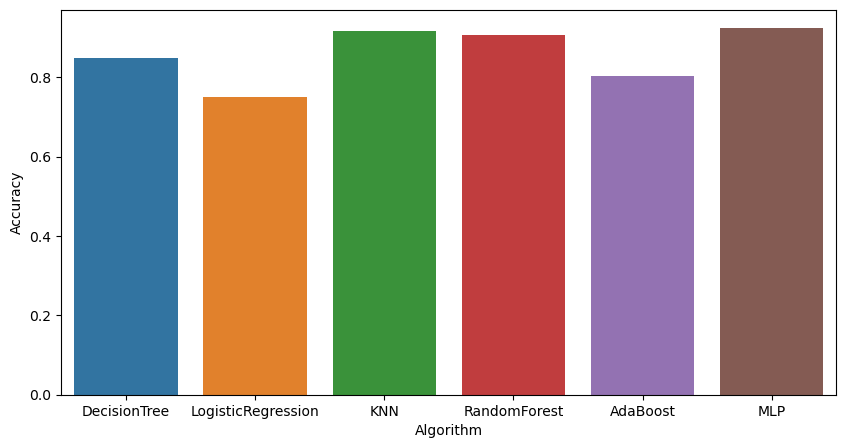

In [69]:
CLASSIFICATION_ALGORITHMS = ["DecisionTree","LogisticRegression","KNN","RandomForest","AdaBoost","MLP"]
results = []

for i in CLASSIFICATION_ALGORITHMS:
    basic_analysis = classification(X, y, i, seed=seed)
    results.append(basic_analysis)

#create a barplot with the accuracy of each algorithm
    
plt.figure(figsize=(10,5))
sns.barplot(x=CLASSIFICATION_ALGORITHMS, y=[i['mean_perf'] for i in results])
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
plt.show()

DATA POLLUTION

In [70]:
def pollute(data, percentage, mean, variance):
    np.random.seed(seed)
    n = int(percentage*data.shape[0])
    data_copy = data.copy()

    for i in range(data.shape[1]):
        idx = np.random.choice(data.shape[0], n, replace=False)
        data_copy[idx, i] = data[idx, i] + np.random.normal(mean, variance, n)
    return data_copy

In [71]:
polluted = []

polluted.append(pollute(X, 0.05, 0, 1))
polluted.append(pollute(X, 0.05, 2, 2))
polluted.append(pollute(X, 0.1, 1, 5))
polluted.append(pollute(X, 0.1, 2, 3))
polluted.append(pollute(X, 0.25, 0.5, 3))
polluted.append(pollute(X, 0.3, 1, 2))
polluted.append(pollute(X, 0.35, 1, 1))
polluted.append(pollute(X, 0.4, 3, 1))
polluted.append(pollute(X, 0.45, 2, 1))
polluted.append(pollute(X, 0.5, 0, 2))

POLLUTED DATA ANALYSIS

In [72]:
polluted_df = pd.DataFrame(polluted[-2])
#print the first column of the polluted dataframe
polluted_df[0]

0      0.973723
1      2.539015
2      0.691031
3     -0.093354
4     -0.100938
         ...   
995    0.490719
996    4.805124
997   -2.555454
998    1.949117
999    0.627196
Name: 0, Length: 1000, dtype: float64

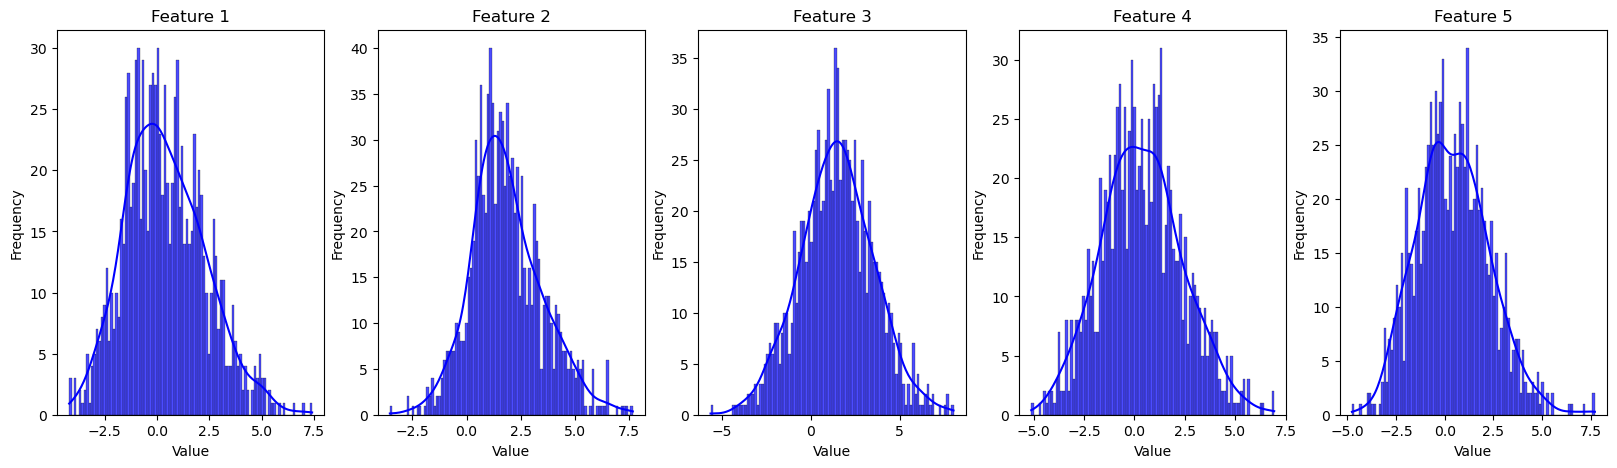

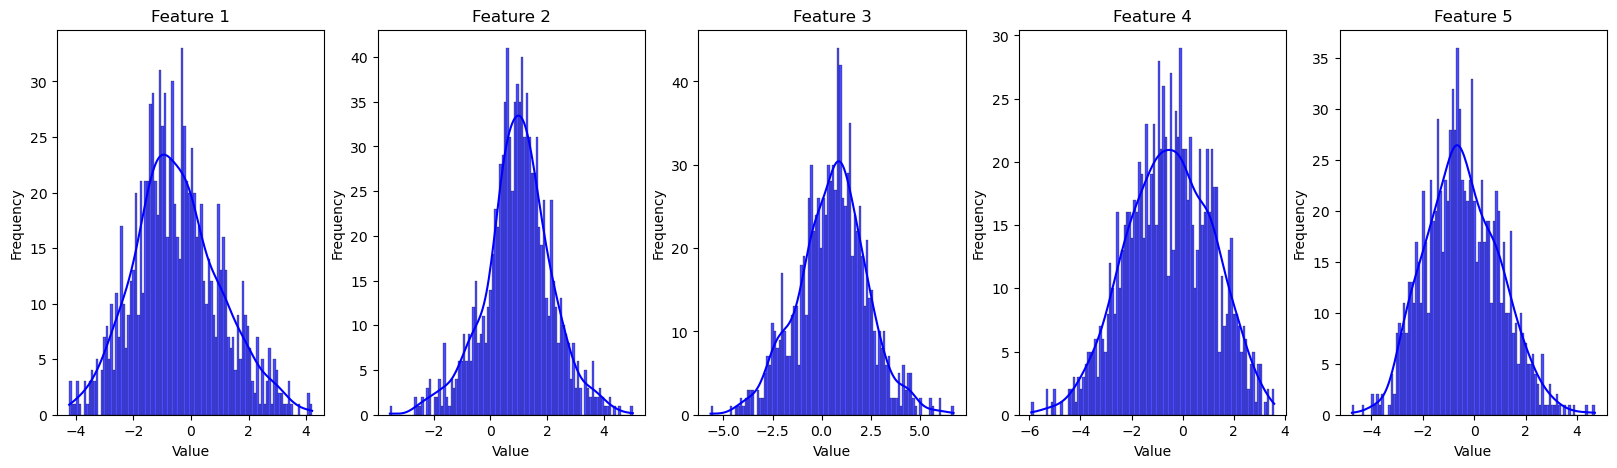

In [73]:
#create a subplot with 1 row and 5 columns
fig, axs = plt.subplots(1, 5, figsize=(20,5))

#plot the histograms of the first 5 features of the polluted dataframe

for i in range(polluted_df.shape[1]):
    #plot a row of histograms with the distribution of the features
    axs[i].set_title('Feature {}'.format(i+1))
    sns.histplot(polluted_df[i], bins=100,color='blue', kde = True, alpha=0.7, label='X', edgecolor='black', ax=axs[i])
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
plt.show()
    

#create a subplot with 1 row and 5 columns
fig, axs = plt.subplots(1, 5, figsize=(20,5))

#plot the histograms of the first 5 features of the polluted dataframe

for i in range(df.shape[1]):
    #plot a row of histograms with the distribution of the features
    axs[i].set_title('Feature '+str(i+1))
    sns.histplot(df[i], bins=100,color='blue', kde = True, alpha=0.7, label='X', edgecolor='black', ax=axs[i])
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
plt.show()


Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for Ra

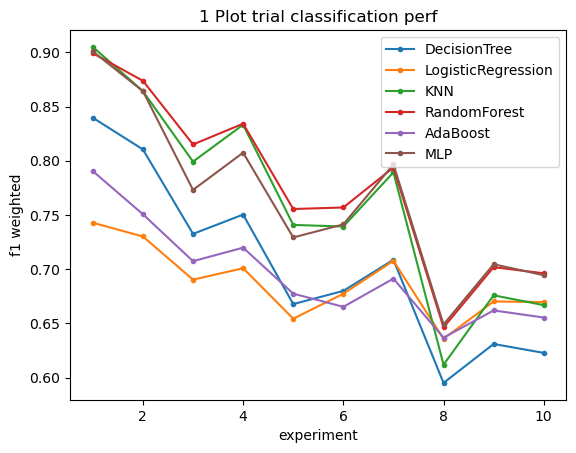

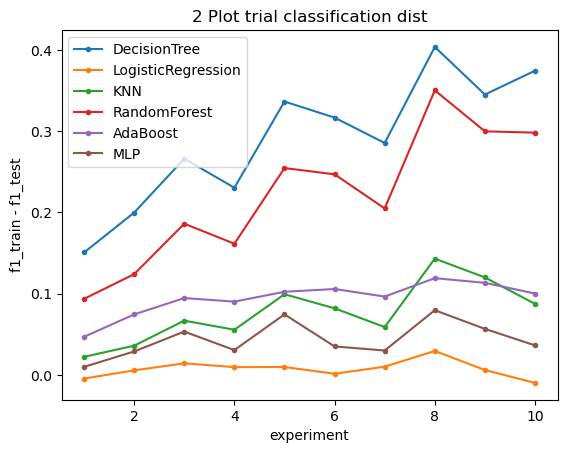

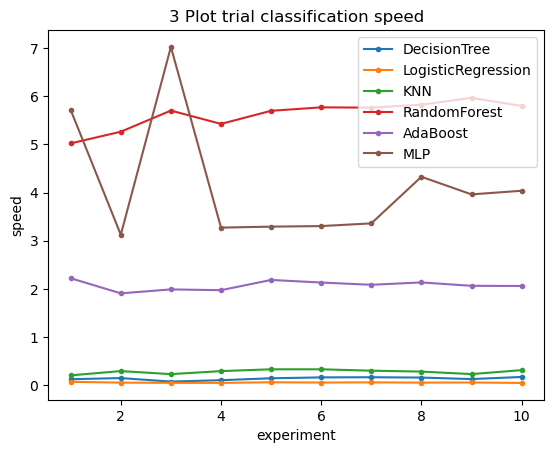

In [74]:
results_for_each_algorithm = []
for algorithm in CLASSIFICATION_ALGORITHMS: # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for polluted_df in polluted: # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION

        # DATA ANALYSIS
        results_1_analysis = classification(polluted_df, y, algorithm, seed)
        results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

# RESULTS EVALUATION
#EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="1 Plot trial classification perf", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="2 Plot trial classification dist", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="3 Plot trial classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

Z-SCORE OUTLIERS DETECTION

In [121]:
def ZS(data, threshold):
    data=data.transpose()
    for column in data:    
        mean = np.mean(column)
        sd = np.std(column) # calculate standard deviation
        outliers = [] # create empty list to store outliers
        for i in column: # detect outliers
            z = (i - mean) / sd  # calculate z-score
            if abs(z) > threshold:  # identify outliers
                outliers.append(i)  # add to the empty list
        
        # print outliers
        print("The detected outliers are: ", str(outliers))
        print("The number of outlier is:", len(outliers))

In [123]:
for polluted_df in polluted:
    ZS(polluted_df,2)

The detected outliers are:  [2.6332129344310804, 2.7267066460734766, -4.186431105046072, 2.7640132079604225, 3.0768127538206693, 2.9811486503681746, 2.7222297035045893, 3.0008001190574247, 2.718985560514774, 2.850095969932134, -3.5738292225640156, 3.471144986784362, -4.232735404323858, -4.002775464516944, 2.9675537436310933, 4.205881828838084, 2.8956844560251156, 3.0616991424361655, 4.082340519894045, 2.8787864001691412, 2.6793921110674663, 3.3598522695414768, 3.7167601915855846, 3.198697015023379, -3.691676489645854, 3.164995388146918, 2.8866637393974375, 2.8603078316503856, 3.0872869185409697, 3.1661268082033045, -3.881972199574657, 2.7268035601955813, 2.989835483111706, 2.5596636319373225, 3.3774324519251873, -4.190490173925497, 4.05662321049353, 3.414122487573791, 2.734930724250363, -3.907975247161796, -3.90039497213925, -4.676873773133239, -3.653838866465131, -4.090546734048649, 2.5779644480968904, -3.5198020083361286, 3.364038536639626, 3.1982307776865673, -3.694085357206969, 2.8

INTERQUARTILE RANGE OUTLIERS DETECTION

In [124]:
def IQR(data):
    data=data.transpose()
    for column in data:
        sorted(column)
        Q1, Q3 = np.percentile(column, [25, 75])
        IQR = Q3 - Q1
        lower_range = Q1 - (1.5 * IQR)
        upper_range = Q3 + (1.5 * IQR)
        outliers = column[((column < lower_range) | (column > upper_range))]
        # print outliers
        print("The detected outliers are: ", str(outliers))
        print("The number of outlier was:", len(outliers))

In [125]:
for polluted_df in polluted:
    IQR(polluted_df)

The detected outliers are:  [ 3.47114499  4.20588183  4.08234052  3.35985227  3.71676019  3.37743245
  4.05662321  3.41412249 -4.67687377  3.36403854]
The number of outlier was: 10
The detected outliers are:  [-1.93057337 -2.25108602 -2.24526949 -2.14007255 -2.46459494  4.54712858
 -2.65429216  3.91851482  3.95940324 -2.15739448 -2.66270855 -2.1535812
 -3.54032455 -1.83852529  3.76515897  5.02679209  3.90919868  4.40825413
 -1.78741443 -1.65950424 -2.55824146 -1.63696076  4.25397     3.66327959
  4.2321502  -1.60846279 -2.36594204 -1.97159058 -2.47033398  4.41231366
 -1.77677624 -2.13679321  4.03926989 -1.9113122  -2.35160161 -1.78907472
 -1.62679702 -1.77400574  3.67162949  3.90428933 -1.62290469  3.86410371
  4.1434946  -1.82597596  3.75616938 -2.37015876 -1.64117604]
The number of outlier was: 47
The detected outliers are:  [-4.40984794  5.52794731 -4.62665332 -4.58508743 -4.24337762  6.71883893
  5.04062536 -3.90470304  5.70580386 -5.65766879  6.08533132 -4.16101148
 -4.08584607  6